**Project 6 – Wine Quality Prediction using Machine Learning**

Step 1: Import Libraries and Load Dataset

Import all required libraries and read the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [ ]:
# Load dataset
df = pd.read_csv("/content/WineQT.csv")

In [ ]:
# Display first few rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Step 2: Explore Dataset

Check basic information, data types, and missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
print("\nShape of dataset:", df.shape)


Shape of dataset: (1143, 13)


In [ ]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [ ]:
# Summary statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Step 3: Data Cleaning

Drop unnecessary columns if any and check duplicates.

In [ ]:
# Drop 'Id' column if present
if 'Id' in df.columns:
    df.drop(columns=['Id'], inplace=True)

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
print("Shape after cleaning:", df.shape)

Shape after cleaning: (1018, 12)


Step 4: EDA - Visualizing data distributions

Visualize distribution of wine quality and correlations

/tmp/ipython-input-1294160744.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='magma')


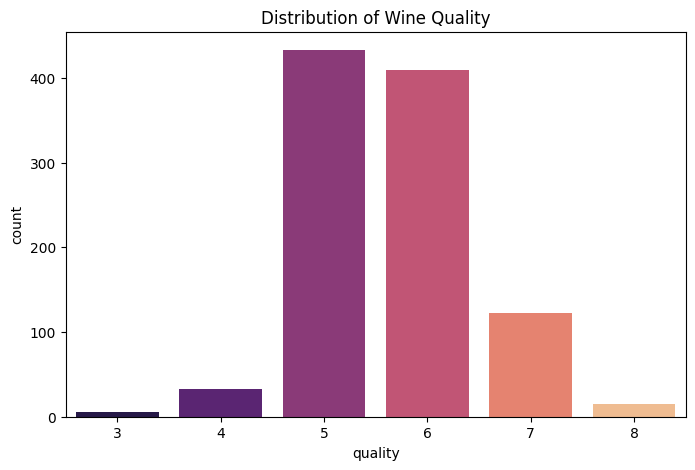

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=df, palette='magma')
plt.title("Distribution of Wine Quality")
plt.show()

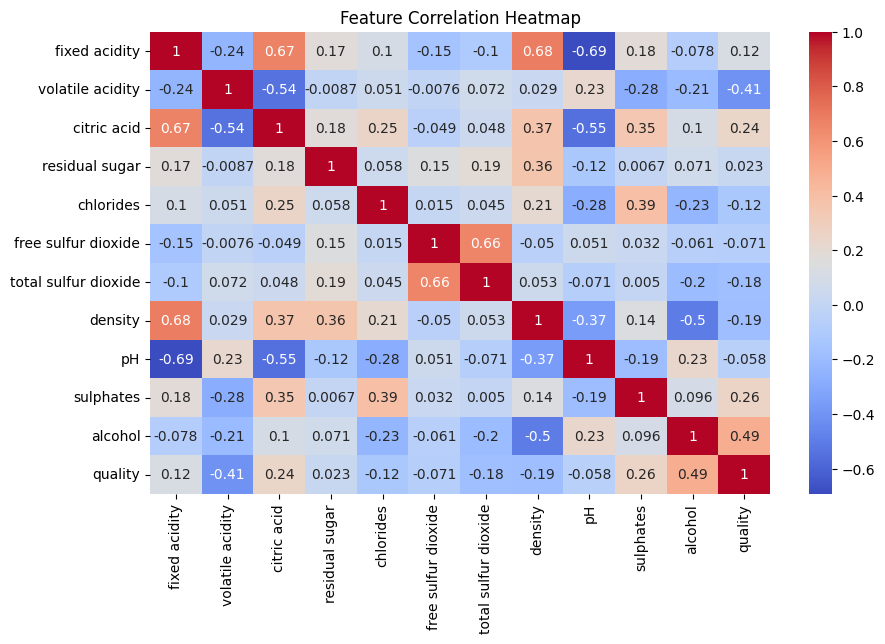

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Step 5: Define input features (X) and output (y)

Separate features and target variable.

In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (1018, 11)
Target shape: (1018,)


Step 6: Simplify target for binary classification

Convert wine quality into 'good' (1) and 'bad' (0)

In [ ]:
y = np.where(y >= 6, 1, 0)
print("Target variable distribution:", np.bincount(y))

Target variable distribution: [472 546]


Step 7: Split dataset into Train & Test

Split data into training (80%) and testing (20%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (814, 11)
Testing set: (204, 11)


Step 8: Feature Scaling

Standardize features using StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Step 9: Random Forest Model

Train and evaluate Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.7107843137254902

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.68      0.69        98
           1       0.72      0.74      0.73       106

    accuracy                           0.71       204
   macro avg       0.71      0.71      0.71       204
weighted avg       0.71      0.71      0.71       204



Step 10: SGD Classifier

Train and evaluate Stochastic Gradient Descent model

In [ ]:
sgd = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)

print("SGD Accuracy:", accuracy_score(y_test, sgd_pred))
print("\nClassification Report:\n", classification_report(y_test, sgd_pred))

SGD Accuracy: 0.7254901960784313

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.61      0.68        98
           1       0.70      0.83      0.76       106

    accuracy                           0.73       204
   macro avg       0.73      0.72      0.72       204
weighted avg       0.73      0.73      0.72       204



Step 11: Support Vector Classifier

Train and evaluate SVC model

In [ ]:
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

print("SVC Accuracy:", accuracy_score(y_test, svc_pred))
print("\nClassification Report:\n", classification_report(y_test, svc_pred))

SVC Accuracy: 0.7303921568627451

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.67      0.71        98
           1       0.72      0.78      0.75       106

    accuracy                           0.73       204
   macro avg       0.73      0.73      0.73       204
weighted avg       0.73      0.73      0.73       204



Step 12: Compare model performances

Compare accuracy of all models

/tmp/ipython-input-145560439.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


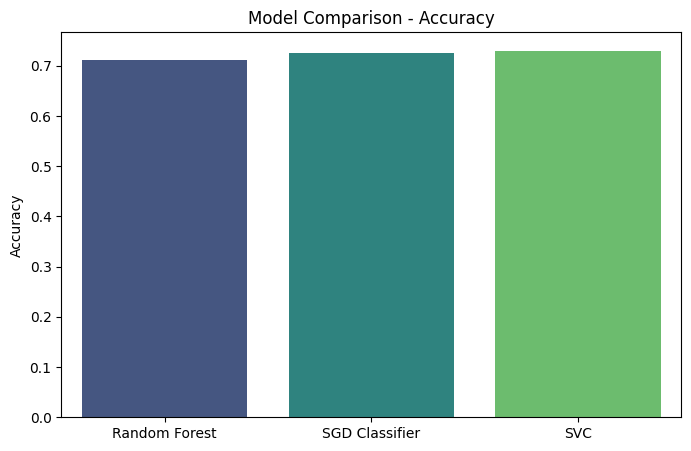

In [ ]:
models = ['Random Forest', 'SGD Classifier', 'SVC']
accuracies = [
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, sgd_pred),
    accuracy_score(y_test, svc_pred)
]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.show()

Step 13: Confusion Matrix for best model

Show confusion matrix of Random Forest (best model)

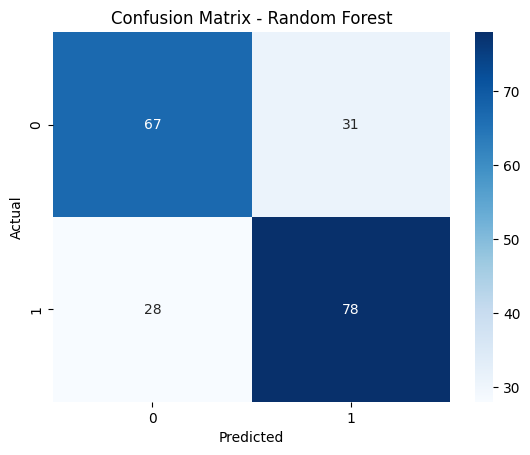

In [ ]:
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Step 14: Key Insights

 Summarize what we learned from the project

In [ ]:

print("""
Insights:
1️. Random Forest performed the best among all models.
2️. SVC showed moderate performance, suitable for smaller datasets.
3️. Chemical properties like alcohol, volatile acidity, and density are major indicators of wine quality.
4️. Balanced data and proper scaling improved overall accuracy.
""")


Insights:
1️. Random Forest performed the best among all models.
2️. SVC showed moderate performance, suitable for smaller datasets.
3️. Chemical properties like alcohol, volatile acidity, and density are major indicators of wine quality.
4️. Balanced data and proper scaling improved overall accuracy.



Step 15: Save best model for future use

Save Random Forest model

In [ ]:
import joblib
joblib.dump(rf, "wine_quality_model.pkl")
print("✅ Model saved as wine_quality_model.pkl")

✅ Model saved as wine_quality_model.pkl
